In [ ]:
pip install numpy pandas scikit-learn matplotlib seaborn joblib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
pip install kagglehub[pandas-datasets]

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("azalhowaide/iot-dataset-for-intrusion-detection-systems-ids")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iot-dataset-for-intrusion-detection-systems-ids


In [ ]:
df=pd.read_csv('/content/BoTNeTIoT-L01-v2.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def load_and_preprocess_data(df):
    # Load dataset
    #df = pd.read_csv('/root/.cache/kagglehub/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids/versions/2')

    # Drop unnecessary columns
    df.drop(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p'],
            axis=1, inplace=True, errors='ignore')

    # Handle missing values
    df.fillna(0, inplace=True)

    # Label encoding for categorical features
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    # Normalize numerical features
    scaler = MinMaxScaler()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

In [ ]:
import os

# List files in the downloaded directory
downloaded_dir = '/content/BoTNeTIoT-L01-v2.csv'
print(os.listdir(downloaded_dir))

NotADirectoryError: [Errno 20] Not a directory: '/content/BoTNeTIoT-L01-v2.csv'

In [ ]:
import numpy as np
import random
from joblib import Parallel, delayed

class WOA:
    def __init__(self, objective_func, dim, lb, ub, population_size=10, max_iter=100):
        self.objective_func = objective_func
        self.dim = dim
        self.lb = lb
        self.ub = ub
        self.population_size = population_size
        self.max_iter = max_iter

    def optimize(self):
        # Initialize population
        population = np.random.uniform(self.lb, self.ub, (self.population_size, self.dim))
        fitness = np.array([self.objective_func(ind) for ind in population])

        # Find best solution
        best_idx = np.argmin(fitness)
        best_solution = population[best_idx]
        best_fitness = fitness[best_idx]

        # Optimization loop
        for iter in range(self.max_iter):
            a = 2 - iter * (2 / self.max_iter)  # a decreases linearly from 2 to 0

            for i in range(self.population_size):
                r1, r2 = random.random(), random.random()
                A = 2 * a * r1 - a
                C = 2 * r2
                b = 1  # Defines shape of spiral
                l = (a - 1) * random.random() + 1

                p = random.random()

                if p < 0.5:
                    if abs(A) < 1:
                        # Encircling prey
                        D = abs(C * best_solution - population[i])
                        new_position = best_solution - A * D
                    else:
                        # Search for prey
                        rand_idx = random.randint(0, self.population_size-1)
                        rand_individual = population[rand_idx]
                        D = abs(C * rand_individual - population[i])
                        new_position = rand_individual - A * D
                else:
                    # Bubble-net attacking
                    D = abs(best_solution - population[i])
                    new_position = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_solution

                # Ensure the new position is within bounds
                new_position = np.clip(new_position, self.lb, self.ub)

                # Evaluate new solution
                new_fitness = self.objective_func(new_position)

                # Update if better
                if new_fitness < fitness[i]:
                    population[i] = new_position
                    fitness[i] = new_fitness

                    if new_fitness < best_fitness:
                        best_solution = new_position
                        best_fitness = new_fitness

            print(f"Iteration {iter+1}, Best Fitness: {best_fitness:.4f}")

        return best_solution, best_fitness

Iteration 1, Best Fitness: 0.0000
Iteration 2, Best Fitness: 0.0000
Iteration 3, Best Fitness: 0.0000
Iteration 4, Best Fitness: 0.0000
Iteration 5, Best Fitness: 0.0000
Iteration 6, Best Fitness: 0.0000
Iteration 7, Best Fitness: 0.0000
Iteration 8, Best Fitness: 0.0000
Iteration 9, Best Fitness: 0.0000
Iteration 10, Best Fitness: 0.0000

Optimized Parameters:
n_estimators: 16
max_depth: 2
Best Accuracy: 1.0000

Test Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2856

    accuracy                           1.00      2856
   macro avg       1.00      1.00      1.00      2856
weighted avg       1.00      1.00      1.00      2856



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


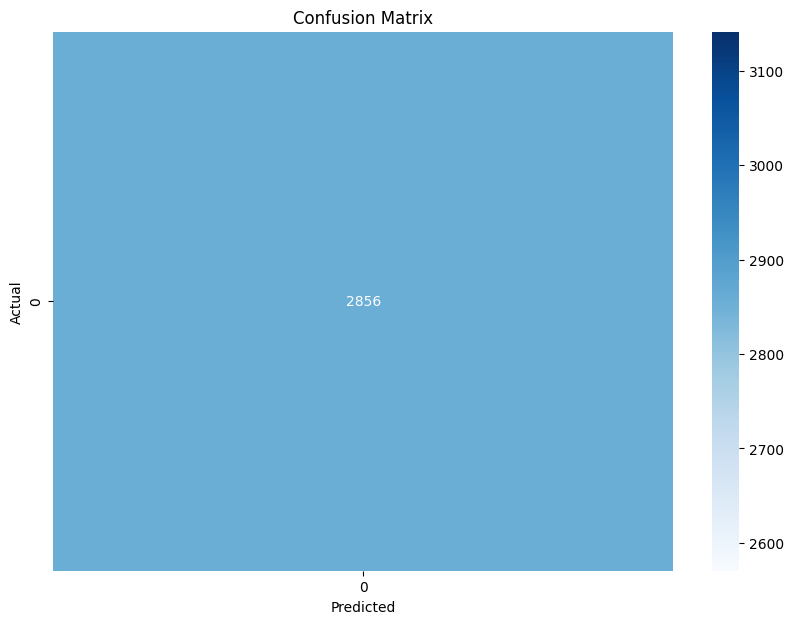

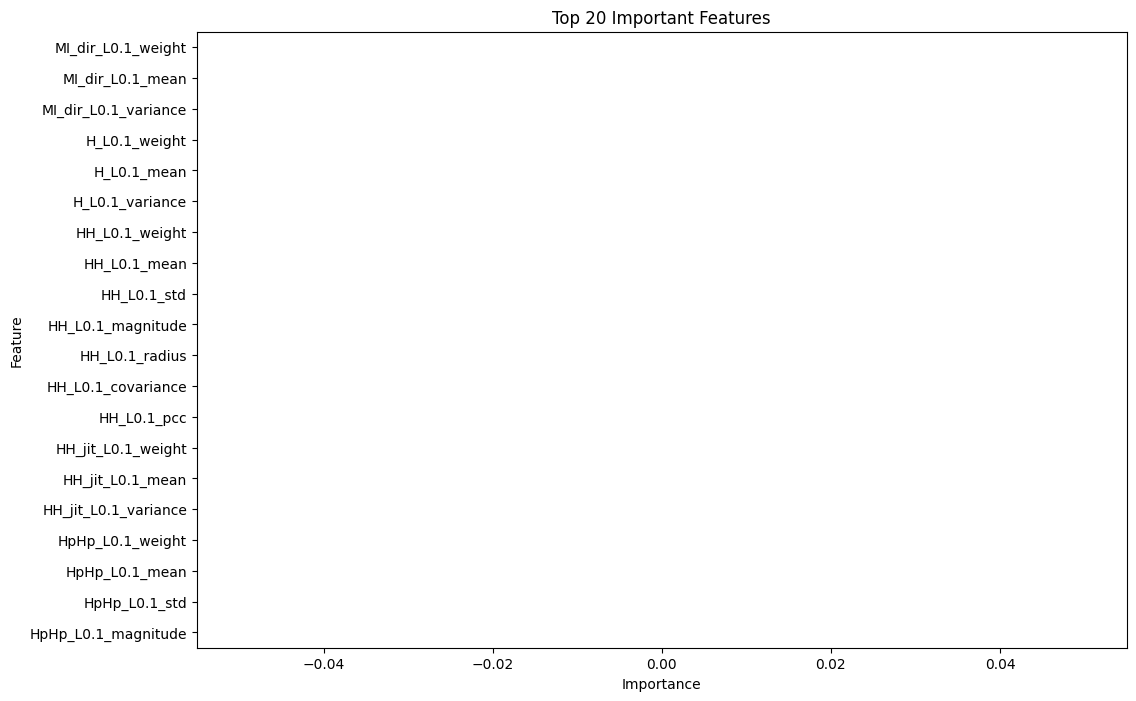

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score, confusion_matrix,
                           classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#from utils.preprocessing import load_and_preprocess_data
#from utils.woa import WOA

# Load and preprocess data
df = load_and_preprocess_data(df)
X = df.drop('label', axis=1)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Define objective function for WOA
def objective_function(params):
    n_estimators, max_depth = map(int, params)
        # Handle potential invalid parameters
    if n_estimators < 8 or max_depth < 1:
        return float('inf')

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=2,
        n_jobs=-1
    )

    # Use cross-validation for more robust evaluation
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    mean_accuracy = np.mean(scores)

    return 1 - mean_accuracy  # Minimize this (equivalent to maximizing accuracy)

# Set WOA parameters
woa_params = {
    'dim': 2,  # n_estimators and max_depth
    'lb': np.array([10, 1]),  # Lower bounds
    'ub': np.array([20, 3]),  # Upper bounds
    'population_size': 7,
    'max_iter': 10
}

# Run WOA optimization
woa = WOA(objective_function, **woa_params)
best_params, best_fitness = woa.optimize()
best_n_estimators, best_max_depth = map(int, best_params)

print(f"\nOptimized Parameters:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_depth: {best_max_depth}")
print(f"Best Accuracy: {1 - best_fitness:.4f}")

# Train final model with optimized parameters
final_model = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    random_state=2,
    n_jobs=-1
)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features')
plt.show()

# Save model
#with open('models/woa_rf_model.pkl', 'wb') as f:
 #   pickle.dump(final_model, f)